In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import os
import sys
import pymongo

%matplotlib inline

In [4]:
#To connect to a remote db pass ip address and port number(if not default i.e. 27017) of remote db to MongoClient
from pymongo import MongoClient
client = MongoClient("10.4.71.69")
# client = MongoClient()

In [5]:
db = client.annon

In [6]:
db.list_collection_names()

['IMAGES',
 'ANNOTATIONS',
 'AIDS',
 'STATS',
 'LOG',
 'RELEASE',
 'ERRORS',
 'CLASSINFO',
 'IMAGELIST',
 'MODELINFO']

In [7]:
collection = db.ANNOTATIONS

In [8]:
ten = collection.find()
entr = list(ten)

In [9]:
df = pd.DataFrame(entr)
df.head()

,_id,ant_id,anndb_id,annon_index,annotation_rel_date,annotation_tool,annotator_id,ant_type,bbox,bboxarea,...,image_name,image_part,image_rel_date,img_id,lbl_id,maskarea,modified_on,region_attributes,rel_filename,shape_attributes
0,5d8a0afd6e739a0444a858ad,ant-48fef622-ffea-4d39-b0d3-1b4016656b16,240919_175423,0,310519,via205,AT2,polygon,"{'ymin': 295, 'xmin': 1244, 'ymax': 722, 'xmax...",288225,...,271218_122102_16716_zed_l_183.jpg,images-p4,310519,img-38507ec2-105d-4ac6-9897-f9898e069d0a,loose_material,14409,None,"{'Label': 'loose_material', 'Color': '', 'Arro...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1918, 191..."
1,5d8a0afd6e739a0444a858af,ant-d21d0ba9-29f6-419e-86b6-e409c4af3ffc,240919_175423,1,310519,via205,AT2,polygon,"{'ymin': 198, 'xmin': 1476, 'ymax': 247, 'xmax...",490,...,271218_122102_16716_zed_l_183.jpg,images-p4,310519,img-38507ec2-105d-4ac6-9897-f9898e069d0a,traffic_sign_frame,154,None,"{'Label': 'traffic_sign_frame', 'Color': '', '...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1483, 147..."
2,5d8a0afd6e739a0444a858b1,ant-928e87fb-a4d5-4d0f-bab2-11909d83008f,240919_175423,2,310519,via205,AT2,polygon,"{'ymin': 202, 'xmin': 1493, 'ymax': 232, 'xmax...",210,...,271218_122102_16716_zed_l_183.jpg,images-p4,310519,img-38507ec2-105d-4ac6-9897-f9898e069d0a,traffic_sign_frame,65,None,"{'Label': 'traffic_sign_frame', 'Color': '', '...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1498, 149..."
3,5d8a0afd6e739a0444a858b3,ant-1d5f8505-4cfc-4788-adea-93c6309a7cd0,240919_175423,3,310519,via205,AT2,polygon,"{'ymin': 227, 'xmin': 1313, 'ymax': 339, 'xmax...",67984,...,271218_122102_16716_zed_l_183.jpg,images-p4,310519,img-38507ec2-105d-4ac6-9897-f9898e069d0a,footpath_polygon,3817,None,"{'Label': 'footpath_polygon', 'Color': '', 'Ar...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1918, 192..."
4,5d8a0afd6e739a0444a858b5,ant-c73bb8d1-2e41-4670-8a09-2a9d7b1a6525,240919_175423,0,310519,via205,AT2,polygon,"{'ymin': 515, 'xmin': 678, 'ymax': 1079, 'xmax...",652548,...,271218_122102_16717_zed_l_303.jpg,images-p4,310519,img-cf6bc02a-8d0d-4b6c-b1c7-917168aa98a9,loose_material,34090,None,"{'Label': 'loose_material', 'Color': '', 'Arro...",images-p4-310519_AT2_via205_310519.json,"{'name': 'polygon', 'all_points_x': [1729, 183..."


In [10]:
annot_df = df[["img_id","rel_filename", "ant_type", "bboxarea", "maskarea", "lbl_id"]]
annot_df.head()

,img_id,rel_filename,ant_type,bboxarea,maskarea,lbl_id
0,img-38507ec2-105d-4ac6-9897-f9898e069d0a,images-p4-310519_AT2_via205_310519.json,polygon,288225,14409,loose_material
1,img-38507ec2-105d-4ac6-9897-f9898e069d0a,images-p4-310519_AT2_via205_310519.json,polygon,490,154,traffic_sign_frame
2,img-38507ec2-105d-4ac6-9897-f9898e069d0a,images-p4-310519_AT2_via205_310519.json,polygon,210,65,traffic_sign_frame
3,img-38507ec2-105d-4ac6-9897-f9898e069d0a,images-p4-310519_AT2_via205_310519.json,polygon,67984,3817,footpath_polygon
4,img-cf6bc02a-8d0d-4b6c-b1c7-917168aa98a9,images-p4-310519_AT2_via205_310519.json,polygon,652548,34090,loose_material


In [11]:
lbl = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="rect":
        if annot_df.img_id[i] in lbl.keys():
            lbl[annot_df.img_id[i]] = lbl[annot_df.img_id[i]] + annot_df.bboxarea[i]
        else:
            lbl[annot_df.img_id[i]] = annot_df.bboxarea[i]

In [12]:
len(lbl)

17409

In [13]:
lbl_df = pd.DataFrame(list(lbl.items()))
lbl_df.columns = ["image_id", "bbox_area"]
lbl_df.head()

,image_id,bbox_area
0,img-cf6bc02a-8d0d-4b6c-b1c7-917168aa98a9,585
1,img-07634b57-5975-4386-830a-def8eed3c204,1479
2,img-69fe1c90-5b43-490e-9a56-b9bd31149302,88
3,img-596af5d5-92f6-423d-bb60-b8a90fdb72d5,285
4,img-b1a71ed4-dd88-4d79-b8d6-9455b9e5f19a,140


In [14]:
lbl_df.bbox_area = (lbl_df.bbox_area/2073600)*100
lbl_df.head()

,image_id,bbox_area
0,img-cf6bc02a-8d0d-4b6c-b1c7-917168aa98a9,0.028212
1,img-07634b57-5975-4386-830a-def8eed3c204,0.071325
2,img-69fe1c90-5b43-490e-9a56-b9bd31149302,0.004244
3,img-596af5d5-92f6-423d-bb60-b8a90fdb72d5,0.013744
4,img-b1a71ed4-dd88-4d79-b8d6-9455b9e5f19a,0.006752


In [15]:
#Uncomment next line to export csv file of img_per_label_df dataframe
#lbl_df.to_csv('bbox_area_per_image.csv')

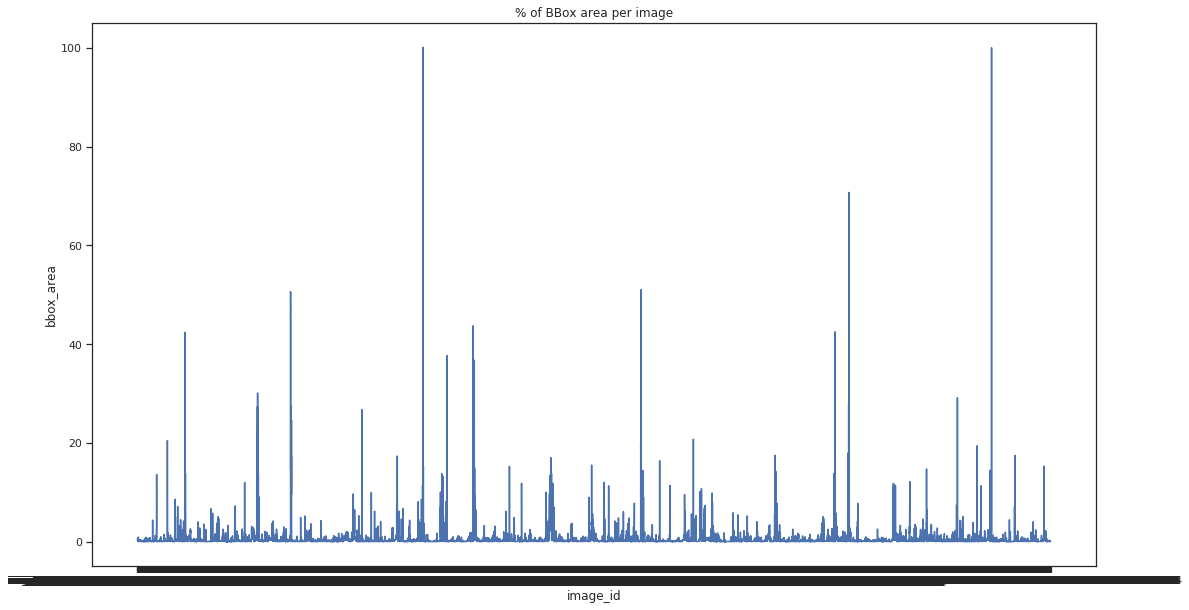

In [25]:
#lists = list(lbl.items())[:200] # sorted by key, return a list of tuples
sns.set(style='ticks', color_codes=True)
#x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(18,10))
#plt.xticks(rotation=80)
#plt.xlabel("Label")
#plt.ylabel("No. of Annotations")
#plt.plot(x, y)
#plt.hist(y, histtype="step")
sns.lineplot(x="image_id", y="bbox_area", data=lbl_df, sort=False)
plt.title("% of BBox area per image")
plt.show()

In [16]:
lbl_p = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="polygon":
        if annot_df.img_id[i] in lbl_p.keys():
            lbl_p[annot_df.img_id[i]] = lbl_p[annot_df.img_id[i]] + annot_df.maskarea[i]
        else:
            lbl_p[annot_df.img_id[i]] = annot_df.maskarea[i]

In [17]:
len(lbl_p)

33857

In [18]:
lbl_p_df = pd.DataFrame(list(lbl_p.items()))
lbl_p_df.columns = ["image_id", "mask_area"]
lbl_p_df.head()

,image_id,mask_area
0,img-38507ec2-105d-4ac6-9897-f9898e069d0a,18445
1,img-cf6bc02a-8d0d-4b6c-b1c7-917168aa98a9,45654
2,img-02b9bc57-5641-4828-a2dc-6747ef1f8511,20968
3,img-07634b57-5975-4386-830a-def8eed3c204,48872
4,img-9ff01364-77d8-473a-8a45-581e52b6cdfa,3283


In [19]:
lbl_p_df.mask_area = (lbl_p_df.mask_area/2073600)*100
lbl_p_df.tail()

,image_id,mask_area
33852,img-68432d2b-a1d6-4df6-8a9c-4535c4e04cd2,0.165461
33853,img-052abb5a-9b81-45d1-9794-797248b3ed5d,0.803096
33854,img-dc4fcd87-40ac-4e50-b97c-c7e527db2fad,0.532649
33855,img-d003b9b4-ce68-4ef0-987f-fb5282474244,0.159819
33856,img-5592f7db-d504-44c6-bb60-7aae0f55ba51,0.976273


In [1]:
#Uncomment next line to export csv file of img_per_label_df dataframe
#lbl_p_df.to_csv('mask_area_per_image.csv')

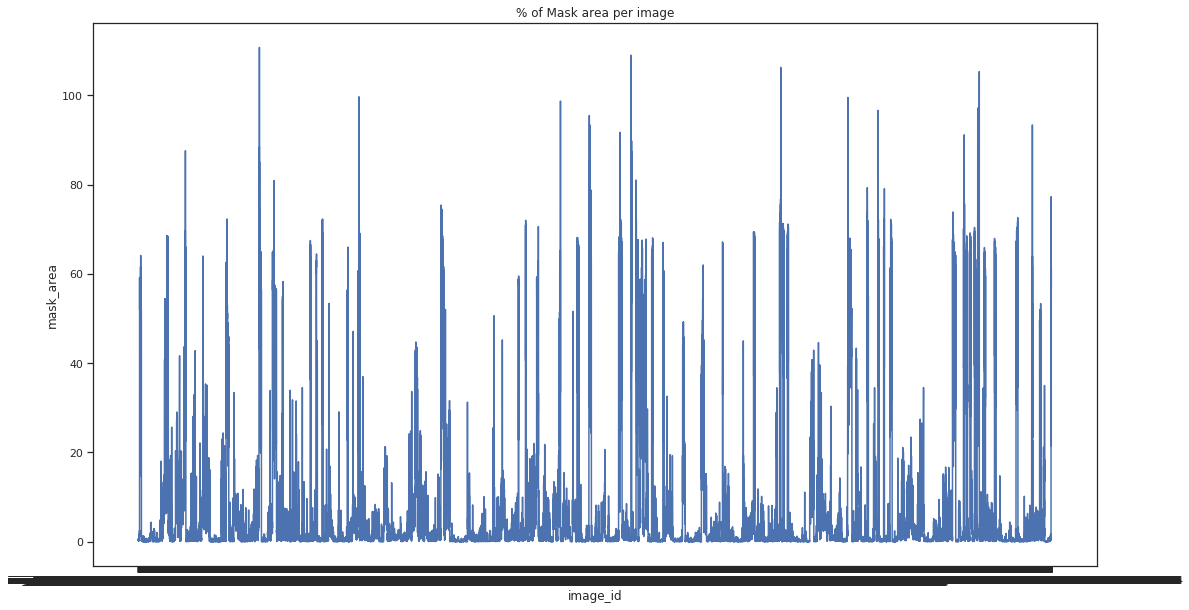

In [35]:
sns.set(style='ticks')
plt.figure(figsize=(18,10))
sns.lineplot(x="image_id", y="mask_area", data=lbl_p_df, sort=False)
plt.title("% of Mask area per image")
plt.show()

In [1]:
#plt.figure(figsize=(18,10))
#sns.lineplot(x="image_id", y="mask_area", data=lbl_p_df[1000:2000], sort=False)
#plt.title("% of Mask area per image")
#plt.show()

In [20]:
lbl_rf = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="polygon":
        if annot_df.img_id[i] in lbl_rf.keys():
            pass
        else:
            lbl_rf[annot_df.img_id[i]] = annot_df.rel_filename[i]

In [21]:
#list(lbl_rf.items())[:100]

In [22]:
lbl_rf_df = pd.DataFrame(list(lbl_rf.items()))
lbl_rf_df.columns = ["image_id", "rel_filename"]
lbl_rf_df.head()

,image_id,rel_filename
0,img-38507ec2-105d-4ac6-9897-f9898e069d0a,images-p4-310519_AT2_via205_310519.json
1,img-cf6bc02a-8d0d-4b6c-b1c7-917168aa98a9,images-p4-310519_AT2_via205_310519.json
2,img-02b9bc57-5641-4828-a2dc-6747ef1f8511,images-p4-310519_AT2_via205_310519.json
3,img-07634b57-5975-4386-830a-def8eed3c204,images-p4-310519_AT2_via205_310519.json
4,img-9ff01364-77d8-473a-8a45-581e52b6cdfa,images-p4-310519_AT2_via205_310519.json


In [21]:
lbl_p_df["rel_filename"] = lbl_rf_df["rel_filename"]
lbl_p_df

,image_id,mask_area,rel_filename
0,img-38507ec2-105d-4ac6-9897-f9898e069d0a,0.889516,images-p4-310519_AT2_via205_310519.json
1,img-cf6bc02a-8d0d-4b6c-b1c7-917168aa98a9,2.201678,images-p4-310519_AT2_via205_310519.json
2,img-02b9bc57-5641-4828-a2dc-6747ef1f8511,1.011188,images-p4-310519_AT2_via205_310519.json
3,img-07634b57-5975-4386-830a-def8eed3c204,2.356867,images-p4-310519_AT2_via205_310519.json
4,img-9ff01364-77d8-473a-8a45-581e52b6cdfa,0.158324,images-p4-310519_AT2_via205_310519.json
5,img-8ece4690-6578-4444-a7ce-18465714fe29,1.279562,images-p4-310519_AT2_via205_310519.json
6,img-9619cb7f-593b-457e-bddd-212b76d0c73d,2.577064,images-p4-310519_AT2_via205_310519.json
7,img-dcee07cb-a407-4840-91be-e8e7b288551d,0.169271,images-p4-310519_AT2_via205_310519.json
8,img-8e1433dd-b9ff-4662-a50c-291ac92288f8,1.316069,images-p4-310519_AT2_via205_310519.json
9,img-6c3ceb3a-1f5f-4cae-94a8-4a05ab683cd9,2.628569,images-p4-310519_AT2_via205_310519.json


In [22]:
data = lbl_p_df.pivot("image_id", "rel_filename", "mask_area")

In [27]:
#data[:10]

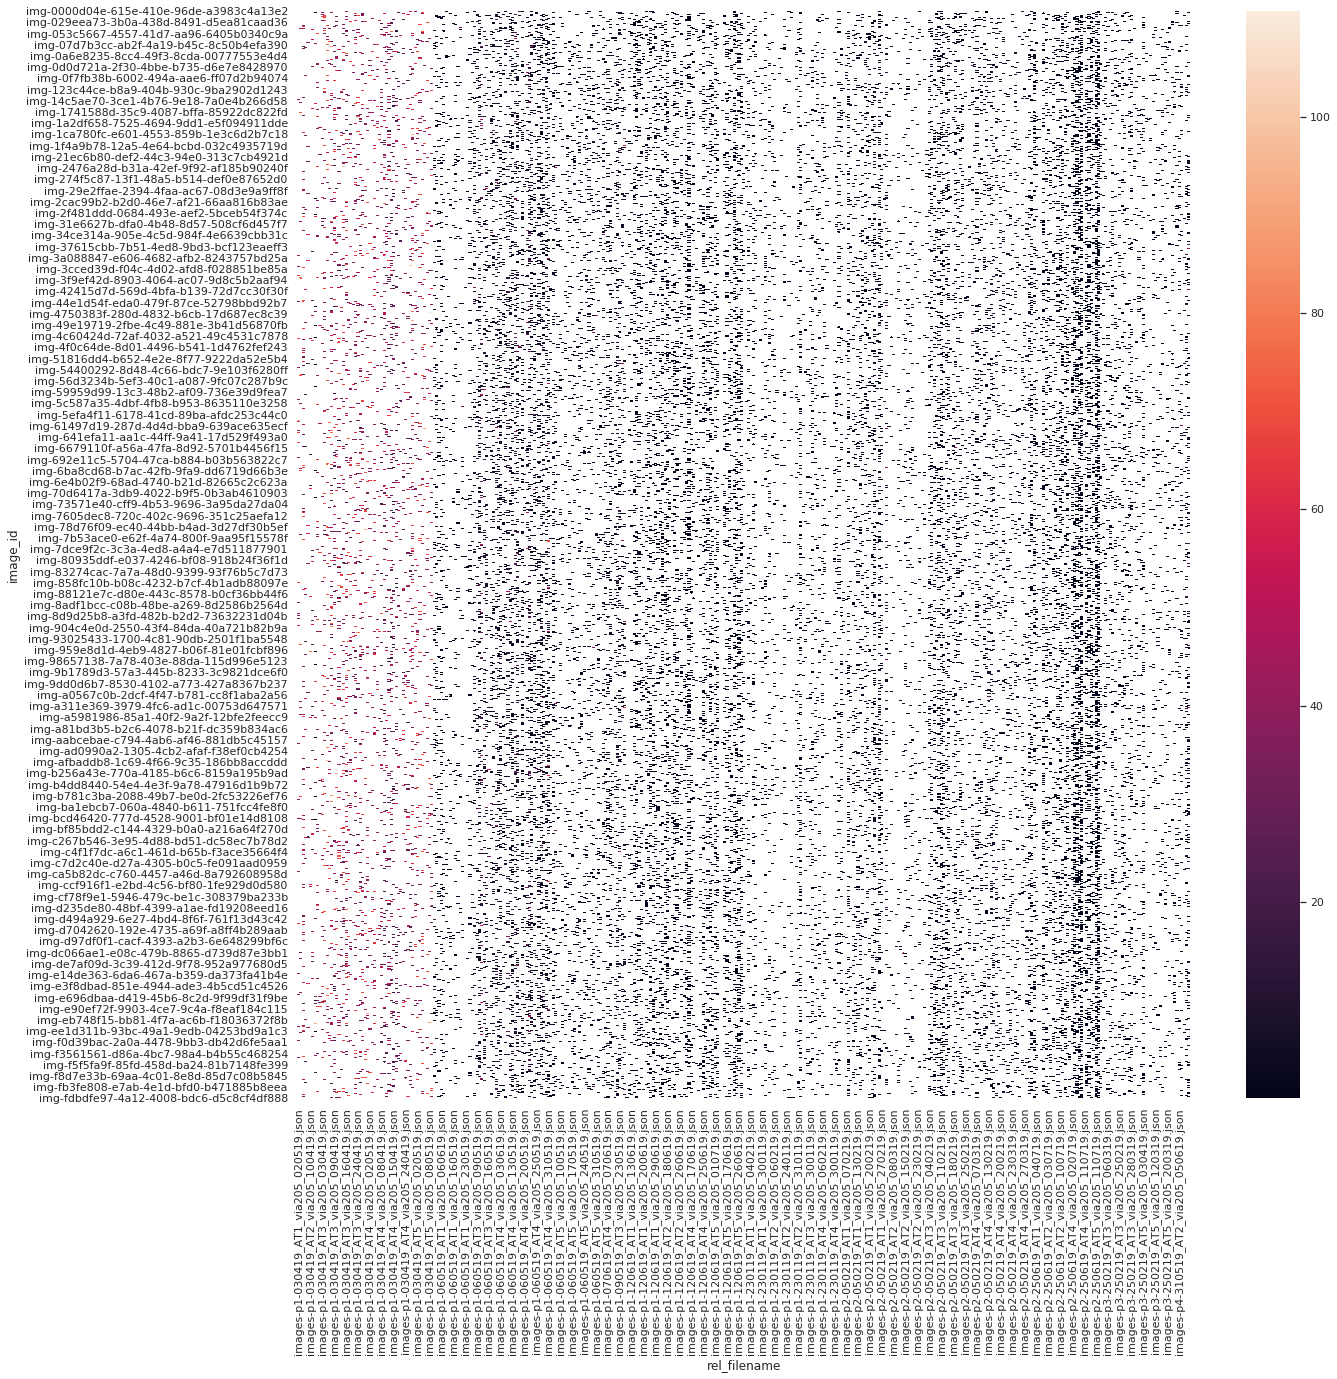

In [199]:
plt.figure(figsize=(20,20))
sns.heatmap(data=data)
plt.show()

In [23]:
area_label = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="polygon":
        if annot_df.lbl_id[i] in area_label.keys():
            area_label[annot_df.lbl_id[i]] = area_label[annot_df.lbl_id[i]] + annot_df.maskarea[i]
        else:
            area_label[annot_df.lbl_id[i]] = annot_df.maskarea[i]

In [24]:
area_label_df = pd.DataFrame(list(area_label.items()))
area_label_df.columns = ["lbl_id", "mask_area"]
area_label_df.sort_values('mask_area', ascending=False, inplace=True)
area_label_df.tail()

,lbl_id,mask_area
6,roadside_spot_light,1116954
24,lane_arrow_marking,568545
16,garbage_can,297715
14,cctv_camera,254203
25,traffic_pole,2189


In [25]:
#Uncomment next line to export csv file of img_per_label_df dataframe
#area_label_df.to_csv('mask_area_per_label.csv')

In [26]:
sorted_area_label = sorted(area_label.items(), reverse=True, key=operator.itemgetter(1))

sorted_area_label

[('road_polygon', 2481871788),
 ('loose_material', 562035085),
 ('footpath_polygon', 308624445),
 ('flyover_pillar', 226986153),
 ('speed_breaker', 91559438),
 ('crosswalk', 89087176),
 ('pole', 76303326),
 ('lane_marking', 71433412),
 ('street_light', 67531388),
 ('signage', 58275293),
 ('traffic_sign', 25942943),
 ('traffic_sign_frame', 23300661),
 ('pothole', 18188490),
 ('billboard', 14766685),
 ('barricade', 10827698),
 ('garbage_pile', 6127418),
 ('roadside_junction_box', 4091467),
 ('traffic_light', 3358038),
 ('booth', 2984839),
 ('reflector', 1288266),
 ('transformer', 1286905),
 ('roadside_spot_light', 1116954),
 ('lane_arrow_marking', 568545),
 ('garbage_can', 297715),
 ('cctv_camera', 254203),
 ('traffic_pole', 2189)]

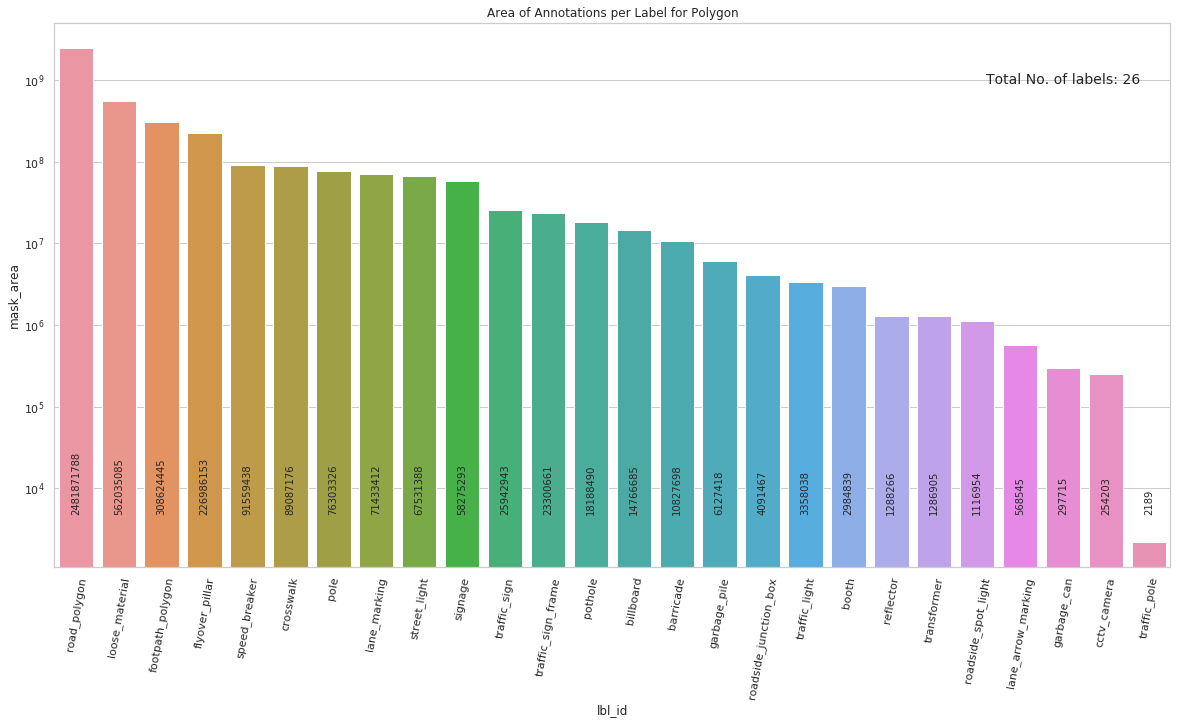

In [27]:
sns.set(style='whitegrid', color_codes=True)
plt.figure(figsize=(20,10))
sns.barplot(x='lbl_id', y = 'mask_area', data =area_label_df)
plt.yscale("log")
plt.xticks(rotation=80)
plt.title("Area of Annotations per Label for Polygon")

for i, j in enumerate(sorted_area_label):
    plt.text(x = i , y = 5000, s = j[1], size=10, rotation=90, horizontalalignment='center')
plt.text(x=23, y=1000000000, s="Total No. of labels: {}".format(len(area_label_df)), horizontalalignment='center', verticalalignment='center', size=14)
#plt.bar(x, y)
plt.show()

In [28]:
area_label_bbox = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="rect":
        if annot_df.lbl_id[i] in area_label_bbox.keys():
            area_label_bbox[annot_df.lbl_id[i]] = area_label_bbox[annot_df.lbl_id[i]] + annot_df.bboxarea[i]
        else:
            area_label_bbox[annot_df.lbl_id[i]] = annot_df.bboxarea[i]

In [29]:
sorted_area_label_bbox = sorted(area_label_bbox.items(), reverse=True, key=operator.itemgetter(1))

sorted_area_label_bbox

[('signage', 48522941),
 ('barricade', 25400475),
 ('traffic_light', 20595263),
 ('speed_breaker', 16740081),
 ('street_light', 12884530),
 ('traffic_sign', 11603941),
 ('billboard', 9435807),
 ('booth', 8677052),
 ('reflector', 5508716),
 ('roadside_junction_box', 4610817),
 ('pole', 3885769),
 ('traffic_sign_frame', 2568186),
 ('cctv_camera', 1448014),
 ('transformer', 1231512),
 ('roadside_spot_light', 915698),
 ('garbage_pile', 797260),
 ('flyover_pillar', 525841),
 ('pothole', 365760),
 ('garbage_can', 319594),
 ('footpath_polygon', 82802),
 ('loose_material', 13093),
 ('road_polygon', 9160)]

In [30]:
area_label_bbox_df = pd.DataFrame(list(area_label_bbox.items()))
area_label_bbox_df.columns = ["lbl_id", "bbox_area"]
area_label_bbox_df.sort_values('bbox_area', ascending=False, inplace=True)
area_label_bbox_df.head()

,lbl_id,bbox_area
3,signage,48522941
5,barricade,25400475
4,traffic_light,20595263
17,speed_breaker,16740081
2,street_light,12884530


In [31]:
#Uncomment next line to export csv file of img_per_label_df dataframe
#area_label_bbox_df.to_csv('bbox_area_per_label.csv')

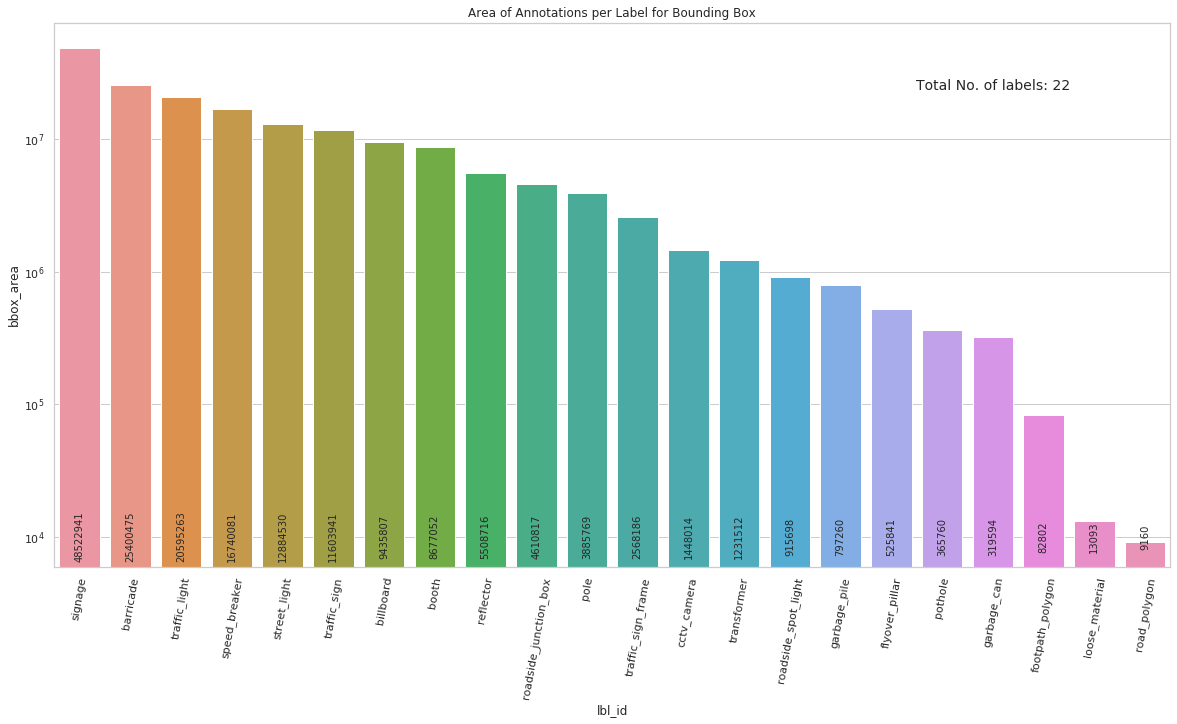

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='lbl_id', y = 'bbox_area', data =area_label_bbox_df)
plt.yscale("log")
plt.xticks(rotation=80)
plt.title("Area of Annotations per Label for Bounding Box")

#for i, j in enumerate(area_label):
#    plt.text(x = i-0.38 , y = j, s = j, size=11)

for i, j in enumerate(sorted_area_label_bbox):
    plt.text(x = i , y = 10000, s = j[1], size=10, rotation=90, horizontalalignment='center', verticalalignment='center')
plt.text(x=18, y=25000000, s="Total No. of labels: {}".format(len(area_label_bbox_df)), horizontalalignment='center', verticalalignment='center', size=14)


#plt.bar(x, y)
plt.show()

In [33]:
comb_dict = {}
for i in range(len(area_label_df)):
    if area_label_df.lbl_id[i] in list(area_label_bbox_df.lbl_id):
        comb_dict[area_label_df.lbl_id[i]] = (area_label_df.mask_area[i] ,area_label_bbox[area_label_df.lbl_id[i]])
    else:
        comb_dict[area_label_df.lbl_id[i]] = (area_label_df.mask_area[i] ,0)
        
comb_dict

{'loose_material': (562035085, 13093),
 'traffic_sign_frame': (23300661, 2568186),
 'footpath_polygon': (308624445, 82802),
 'lane_marking': (71433412, 0),
 'road_polygon': (2481871788, 9160),
 'pole': (76303326, 3885769),
 'roadside_spot_light': (1116954, 915698),
 'signage': (58275293, 48522941),
 'street_light': (67531388, 12884530),
 'traffic_sign': (25942943, 11603941),
 'traffic_light': (3358038, 20595263),
 'reflector': (1288266, 5508716),
 'barricade': (10827698, 25400475),
 'billboard': (14766685, 9435807),
 'cctv_camera': (254203, 1448014),
 'roadside_junction_box': (4091467, 4610817),
 'garbage_can': (297715, 319594),
 'crosswalk': (89087176, 0),
 'speed_breaker': (91559438, 16740081),
 'booth': (2984839, 8677052),
 'transformer': (1286905, 1231512),
 'flyover_pillar': (226986153, 525841),
 'pothole': (18188490, 365760),
 'garbage_pile': (6127418, 797260),
 'lane_arrow_marking': (568545, 0),
 'traffic_pole': (2189, 0)}

In [34]:
new_df = pd.DataFrame(comb_dict).T.reset_index()
new_df.columns = ["labels", "mask_area", "bbox_area"]

In [35]:
new_df.head()

,labels,mask_area,bbox_area
0,loose_material,562035085,13093
1,traffic_sign_frame,23300661,2568186
2,footpath_polygon,308624445,82802
3,lane_marking,71433412,0
4,road_polygon,2481871788,9160


In [36]:
#Uncomment next line to export csv file of img_per_label_df dataframe
#new_df.to_csv('mask_and_bbox_area_per_label.csv')

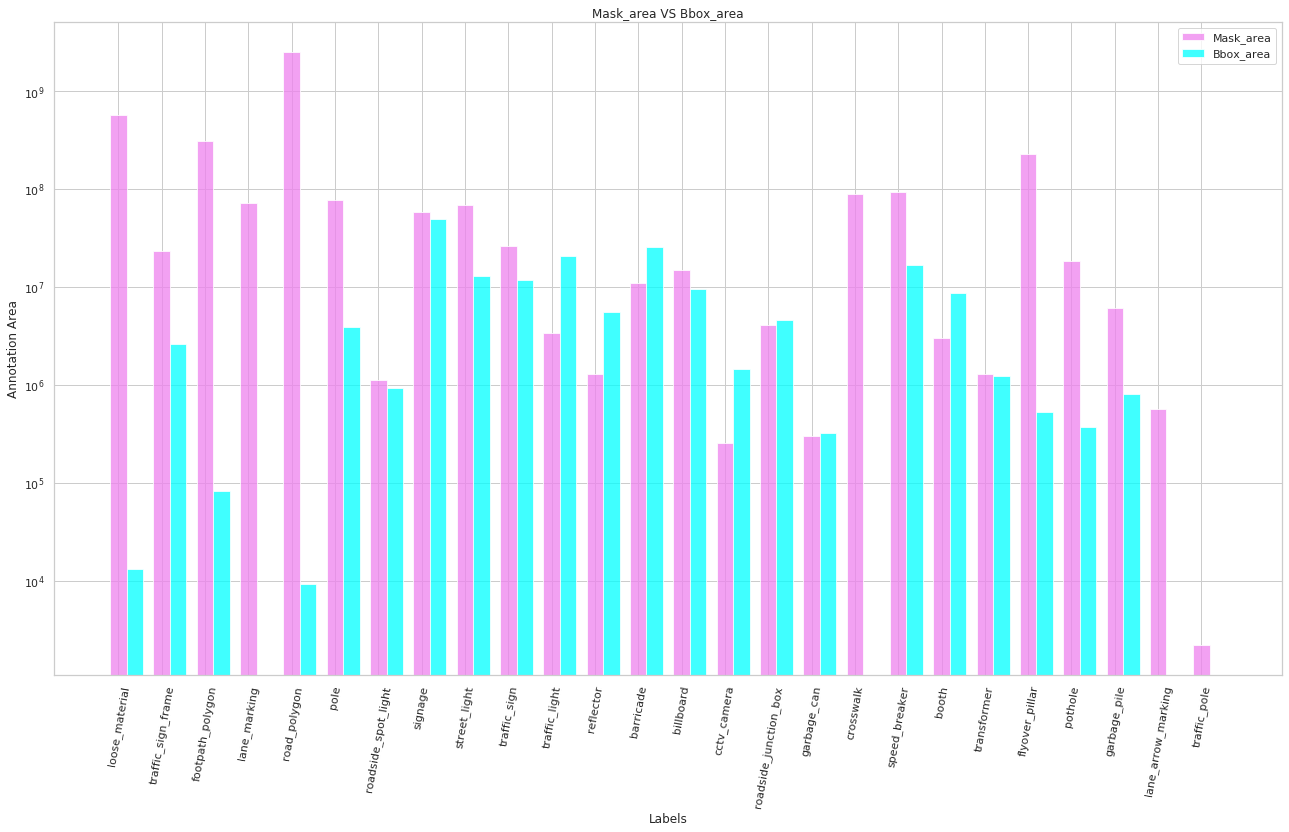

In [37]:
# data to plot
n_groups = 26
mask = list(new_df.mask_area)
bbox = list(new_df.bbox_area)

# create plot
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.38
opacity = 0.75

plt.figure(figsize=(22,12))

rects1 = plt.bar(index, mask, bar_width,
alpha=opacity,
color='violet',
label='Mask_area')

rects2 = plt.bar(index + bar_width, bbox, bar_width,
alpha=opacity,
color='cyan',
label='Bbox_area')

plt.yscale("log")

plt.xlabel('Labels')
plt.ylabel('Annotation Area')
plt.title('Mask_area VS Bbox_area')
plt.xticks(index , (list(new_df.labels)), rotation=80)
plt.legend()

#plt.tight_layout()
plt.show()

In [104]:
polygon_label = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="polygon":
        if annot_df.lbl_id[i] in polygon_label.keys():
            polygon_label[annot_df.lbl_id[i]] = polygon_label[annot_df.lbl_id[i]] + 1
        else:
            polygon_label[annot_df.lbl_id[i]] = 1

In [142]:
pass

In [141]:
# sorted(polygon_label.items())

In [108]:
bbox_label = {}
for i in range(len(annot_df)):
    if annot_df.ant_type[i]=="rect":
        if annot_df.lbl_id[i] in bbox_label.keys():
            bbox_label[annot_df.lbl_id[i]] = bbox_label[annot_df.lbl_id[i]] + 1
        else:
            bbox_label[annot_df.lbl_id[i]] = 1

In [140]:
# sorted(bbox_label.items())

In [56]:
label_annot_df = pd.DataFrame(sorted(bbox_label.items()))

In [58]:
temp_df = pd.DataFrame(sorted(polygon_label.items()))

In [75]:
label_annot_df.columns = ["labels", "bbox"]

In [139]:
label_annot_df.head()

,labels,bbox
0,barricade,1569
1,billboard,1683
2,booth,436
3,cctv_camera,4329
4,flyover_pillar,91


In [76]:
temp_df.columns = ["labels", "polygon"]

In [138]:
temp_df.head()

,labels,polygon
0,barricade,588
1,billboard,2952
2,booth,119
3,cctv_camera,140
4,crosswalk,847


In [85]:
# # data to plot
# n_groups = 26
# mask = list(temp_df.polygon)
# bbox = list(label_annot_df.bbox)

# # create plot
# #fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.38
# opacity = 0.75

# plt.figure(figsize=(22,12))

# rects1 = plt.bar(index, mask, bar_width,
# alpha=opacity,
# color='violet',
# label='polygon')

# rects2 = plt.bar(index + bar_width, bbox, bar_width,
# alpha=opacity,
# color='cyan',
# label='bbox')

# # plt.yscale("log")

# plt.xlabel('')
# plt.ylabel('Annotation Area')
# plt.title('Mask_area VS Bbox_area')
# plt.xticks(index , (list(new_df.labels)), rotation=80)
# plt.legend()

# plt.tight_layout()
# plt.show()

In [137]:
n_comb_dict = {}
for i in range(len(temp_df)):
    if temp_df.labels[i] in list(label_annot_df.labels):
        n_comb_dict[temp_df.labels[i]] = (temp_df.polygon[i] ,bbox_label[temp_df.labels[i]])
    else:
        n_comb_dict[temp_df.labels[i]] = (temp_df.polygon[i] ,0)
        
# n_comb_dict

In [113]:
n_comb_df = pd.DataFrame(n_comb_dict).T

In [117]:
n_comb_df.reset_index(level=0, inplace=True)

In [119]:
n_comb_df.columns = ["Labels", "Polygon", "BBox"]

In [136]:
n_comb_df.head()

,Labels,Polygon,BBox
0,barricade,588,1569
1,billboard,2952,1683
2,booth,119,436
3,cctv_camera,140,4329
4,crosswalk,847,0


In [131]:
plot_df = pd.melt(n_comb_df, id_vars='Labels', var_name="Legend", value_name="Total Numbers")

In [135]:
plot_df.head()

,Labels,Legend,Total Numbers
0,barricade,Polygon,588
1,billboard,Polygon,2952
2,booth,Polygon,119
3,cctv_camera,Polygon,140
4,crosswalk,Polygon,847


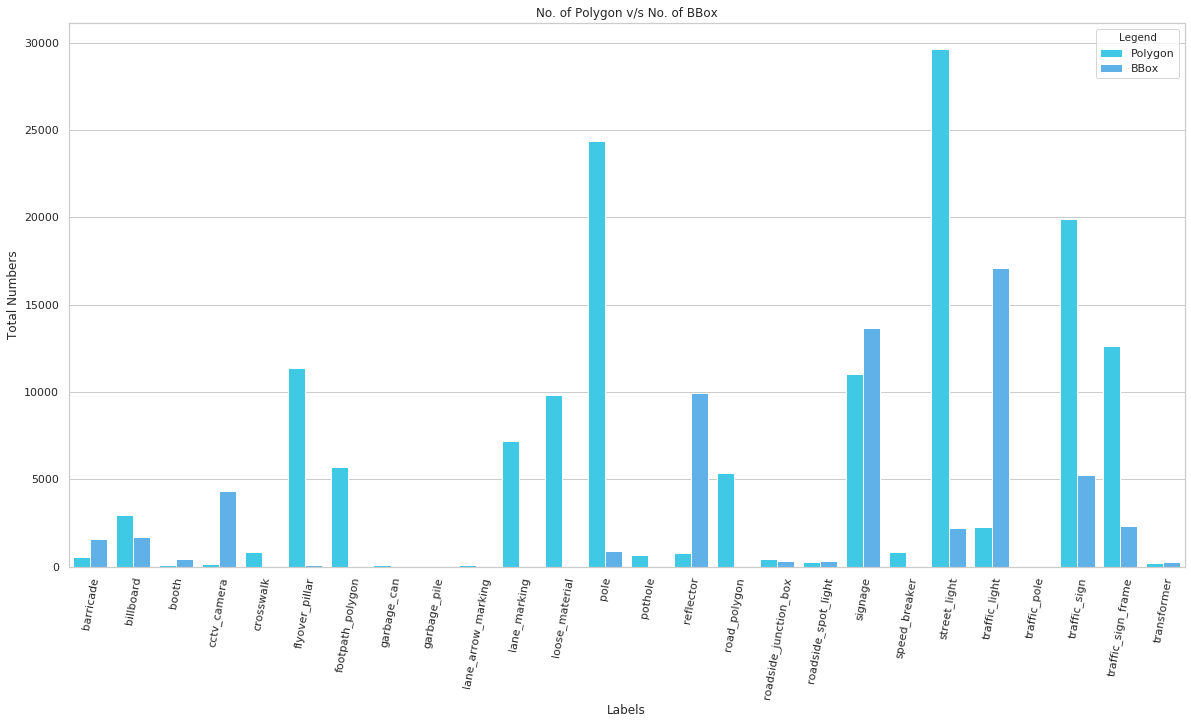

In [134]:
sns.set(style='whitegrid')
sns.set_palette("cool")
plt.figure(figsize=(20,10))
sns.barplot(x='Labels', y = 'Total Numbers', hue='Legend', data =plot_df)
plt.xticks(rotation=80)
plt.title("No. of Polygon v/s No. of BBox")
plt.show()